Confusion Matrix Size: (101, 101)


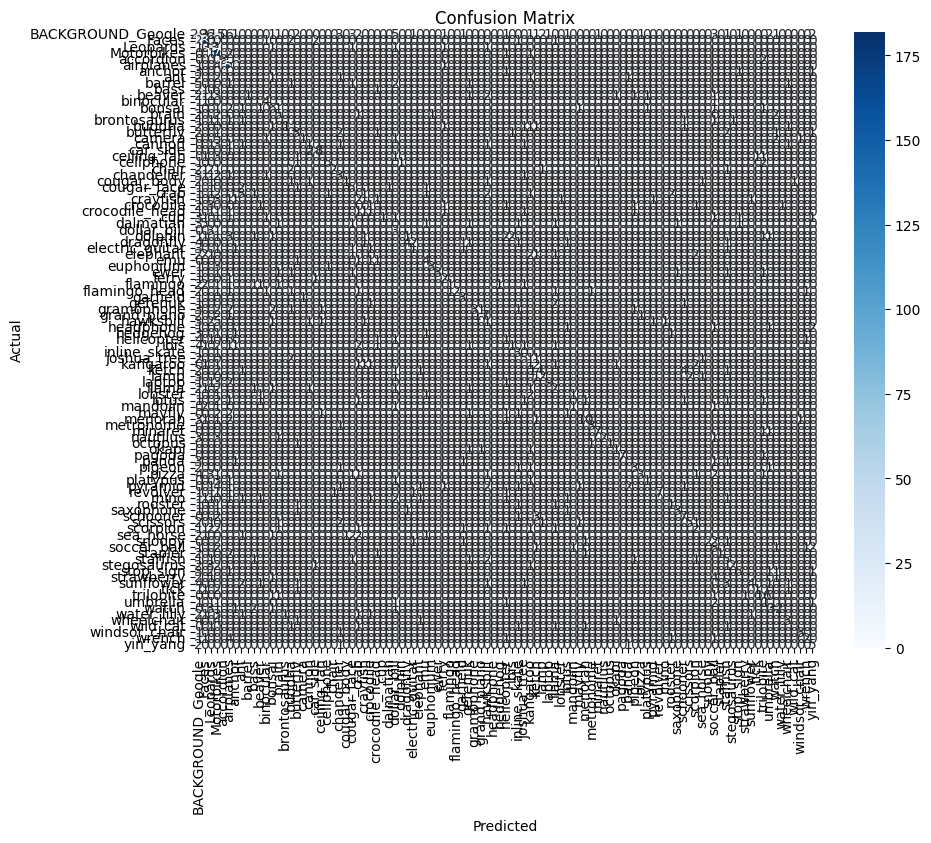

Confusion Matrix:
[[ 29   3   6 ...   0   0   2]
 [  2 182   0 ...   0   0   0]
 [  1   0  33 ...   0   0   0]
 ...
 [  1   0   0 ...   8   0   0]
 [  1   1   0 ...   0   2   0]
 [  2   0   0 ...   0   0   5]]


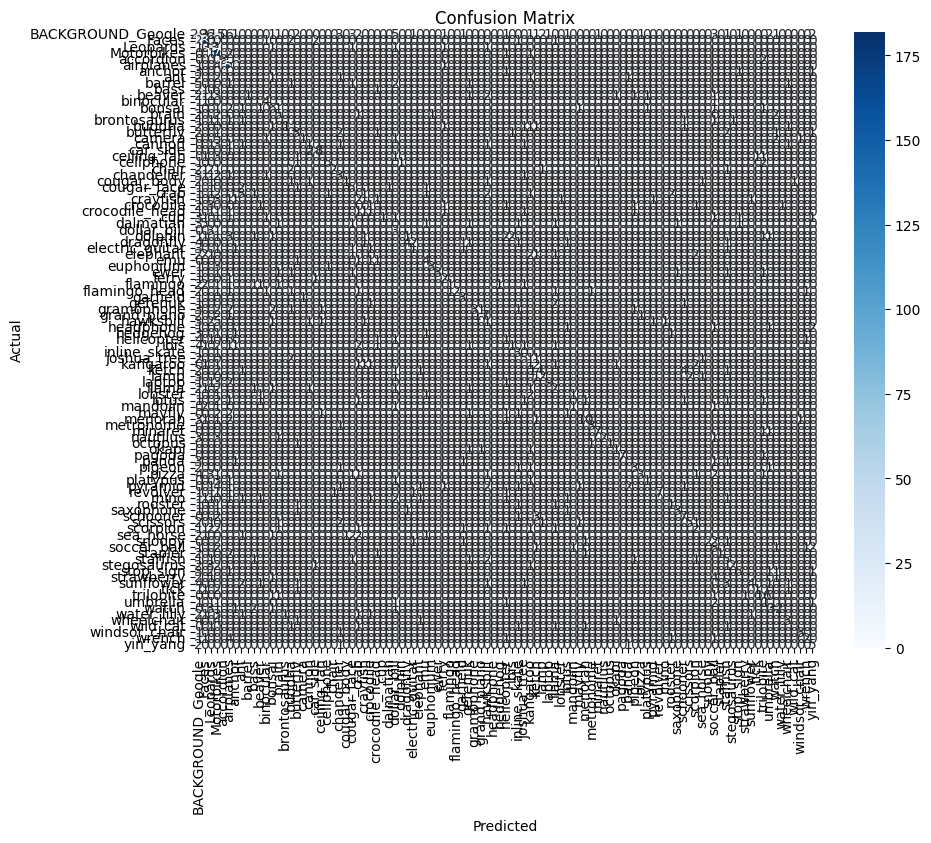

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
images_df = pd.read_csv('Images.csv', sep=';', skiprows=1, names=['ID', 'class'])
edge_hist_df = pd.read_csv('EdgeHistogram.csv', sep=';', skiprows=1, names=['ID']+ [f'feature_{i}' for i in range(1, 81)])

# Merge datasets
merged_df = pd.merge(images_df, edge_hist_df, on='ID')
#print(merged_df.head(50))

# Split data into features (X) and target (y)
X = merged_df.iloc[:, 3:]  # Assuming you want to use feature columns for X
y = merged_df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9]}  # You can adjust the number of neighbors
knn_grid_search = GridSearchCV(knn_model, knn_params, cv=5)
knn_grid_search.fit(X_train, y_train)
knn_best_model = knn_grid_search.best_estimator_

# Model Evaluation
knn_pred = knn_best_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Save results to CSV
results_df = pd.DataFrame({'Model': ['K-Nearest Neighbors'],
                            'Accuracy': [knn_accuracy]})
results_df.to_csv('classification_results_knn.csv', index=False)



# Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_pred)

# Print Confusion Matrix
print("Confusion Matrix Size:", conf_matrix.shape)




# Save Confusion Matrix to CSV
conf_matrix_df = pd.DataFrame(conf_matrix, index=knn_best_model.classes_, columns=knn_best_model.classes_)
conf_matrix_df.to_csv('confusion_matrix.csv')


# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=knn_best_model.classes_, yticklabels=knn_best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)





# # Model 1: Support Vector Machine
# svm_model = SVC()
# svm_params = {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']}
# svm_grid_search = GridSearchCV(svm_model, svm_params, cv=5)
# svm_grid_search.fit(X_train, y_train)
# svm_best_model = svm_grid_search.best_estimator_

# # Model 2: Decision Tree
# dt_model = DecisionTreeClassifier()
# dt_params = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
# dt_grid_search = GridSearchCV(dt_model, dt_params, cv=5)
# dt_grid_search.fit(X_train, y_train)
# dt_best_model = dt_grid_search.best_estimator_

# # Model 3: Random Forest
# rf_model = RandomForestClassifier()
# rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
# rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5)
# rf_grid_search.fit(X_train, y_train)
# rf_best_model = rf_grid_search.best_estimator_

# # Model Evaluation
# svm_pred = svm_best_model.predict(X_test)
# dt_pred = dt_best_model.predict(X_test)
# rf_pred = rf_best_model.predict(X_test)

# svm_accuracy = accuracy_score(y_test, svm_pred)
# dt_accuracy = accuracy_score(y_test, dt_pred)
# rf_accuracy = accuracy_score(y_test, rf_pred)

# # Save results to CSV
# results_df = pd.DataFrame({'Model': ['SVM', 'Decision Tree', 'Random Forest'],
#                             'Accuracy': [svm_accuracy, dt_accuracy, rf_accuracy]})
# results_df.to_csv('classification_results.csv', index=False)
